In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
t = pd.read_csv("./data/Train-1542865627584.csv")
b = pd.read_csv("./data/Train_Beneficiarydata-1542865627584.csv")
i = pd.read_csv("./data/Train_Inpatientdata-1542865627584.csv")
o = pd.read_csv("./data/Train_Outpatientdata-1542865627584.csv")

tt = pd.read_csv("./data/Test-1542969243754.csv")
tb = pd.read_csv("./data/Test_Beneficiarydata-1542969243754.csv")
ti = pd.read_csv("./data/Test_Inpatientdata-1542969243754.csv")
to = pd.read_csv("./data/Test_Outpatientdata-1542969243754.csv")


(len(t), len(b), len(i), len(o))

(5410, 138556, 40474, 517737)

In [ ]:
df = pd.concat([i,o])
df = pd.merge(df, t, on="Provider", how="outer")
df = df.fillna(0)

df2 = pd.concat([ti,to])
df2 = pd.merge(df2, tt, on="Provider", how="outer")
df2 = df2.fillna(0)

# Labeling categorical data

In [ ]:
from sklearn import preprocessing
catcols = ['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
        'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6']

le = {}
X = pd.concat([df[catcols].astype(str), df2[catcols].astype(str)])
for i in catcols:
    print(i)
    le[i] = preprocessing.LabelEncoder()
    le[i].fit(X[i].astype(str))
    df[i] = le[i].transform(df[i].astype(str))
    df2[i] = le[i].transform(df2[i].astype(str))
        

BeneID
ClaimID
ClaimStartDt
ClaimEndDt
Provider
AttendingPhysician
OperatingPhysician
OtherPhysician
AdmissionDt
ClmAdmitDiagnosisCode
DischargeDt
DiagnosisGroupCode
ClmDiagnosisCode_1
ClmDiagnosisCode_2
ClmDiagnosisCode_3
ClmDiagnosisCode_4
ClmDiagnosisCode_5
ClmDiagnosisCode_6
ClmDiagnosisCode_7
ClmDiagnosisCode_8
ClmDiagnosisCode_9
ClmDiagnosisCode_10
ClmProcedureCode_1
ClmProcedureCode_2
ClmProcedureCode_3
ClmProcedureCode_4
ClmProcedureCode_5
ClmProcedureCode_6


# Preparing the dataset

In [ ]:
cols = ['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6']

X = df[cols]
Y = df["PotentialFraud"].apply(lambda x: True if x == "Yes" else False)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.10, random_state=42)

# Training

In [ ]:
import xgboost as xgb
clf = xgb.XGBClassifier(n_jobs=12, eval_metric=["auc","error","logloss"], n_estimators=200)
clf.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=10)

[0]	validation_0-auc:0.71607	validation_0-error:0.30188	validation_0-logloss:0.61803	validation_1-auc:0.71343	validation_1-error:0.30293	validation_1-logloss:0.61840
[10]	validation_0-auc:0.87184	validation_0-error:0.20973	validation_0-logloss:0.47764	validation_1-auc:0.86870	validation_1-error:0.21228	validation_1-logloss:0.47974
[20]	validation_0-auc:0.89474	validation_0-error:0.18163	validation_0-logloss:0.42822	validation_1-auc:0.89145	validation_1-error:0.18514	validation_1-logloss:0.43095
[30]	validation_0-auc:0.90953	validation_0-error:0.16242	validation_0-logloss:0.39759	validation_1-auc:0.90615	validation_1-error:0.16571	validation_1-logloss:0.40099
[40]	validation_0-auc:0.91781	validation_0-error:0.15283	validation_0-logloss:0.37799	validation_1-auc:0.91414	validation_1-error:0.15641	validation_1-logloss:0.38201
[50]	validation_0-auc:0.92470	validation_0-error:0.14499	validation_0-logloss:0.36024	validation_1-auc:0.92059	validation_1-error:0.14879	validation_1-logloss:0.36530

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=['auc', 'error', 'logloss'],
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=12, num_parallel_tree=None, random_state=None, ...)

# Feature importance plot

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

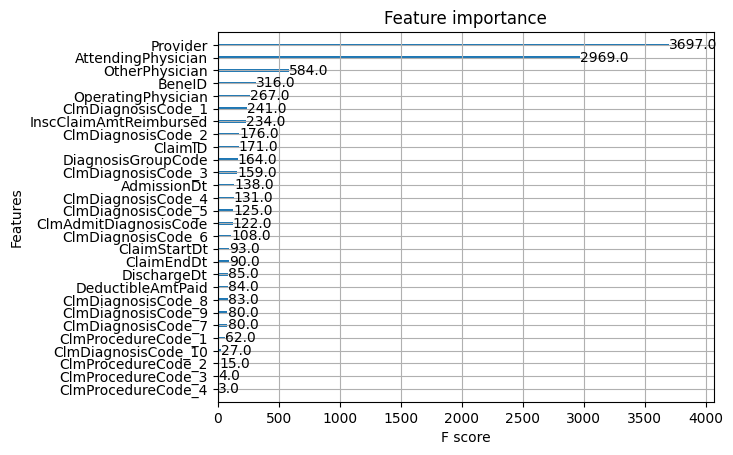

In [ ]:
from xgboost import plot_importance
plot_importance(clf)

# Removing the provider, just to see if the model reacts well

In [ ]:
cols = ['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6']

X = df[cols]
Y = df["PotentialFraud"].apply(lambda x: True if x == "Yes" else False)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.10, random_state=42)

In [ ]:
import xgboost as xgb
clf = xgb.XGBClassifier(n_jobs=12, eval_metric=["auc","error","logloss"], n_estimators=500)
clf.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=10)

[0]	validation_0-auc:0.58750	validation_0-error:0.37710	validation_0-logloss:0.65590	validation_1-auc:0.58906	validation_1-error:0.37743	validation_1-logloss:0.65567
[10]	validation_0-auc:0.67065	validation_0-error:0.33433	validation_0-logloss:0.62233	validation_1-auc:0.67097	validation_1-error:0.33426	validation_1-logloss:0.62237
[20]	validation_0-auc:0.69895	validation_0-error:0.32109	validation_0-logloss:0.60679	validation_1-auc:0.69776	validation_1-error:0.32186	validation_1-logloss:0.60769
[30]	validation_0-auc:0.71442	validation_0-error:0.31279	validation_0-logloss:0.59573	validation_1-auc:0.71104	validation_1-error:0.31394	validation_1-logloss:0.59756
[40]	validation_0-auc:0.72480	validation_0-error:0.30473	validation_0-logloss:0.58787	validation_1-auc:0.71949	validation_1-error:0.30705	validation_1-logloss:0.59085
[50]	validation_0-auc:0.72983	validation_0-error:0.30109	validation_0-logloss:0.58333	validation_1-auc:0.72250	validation_1-error:0.30501	validation_1-logloss:0.58747

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=['auc', 'error', 'logloss'],
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=500,
              n_jobs=12, num_parallel_tree=None, random_state=None, ...)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

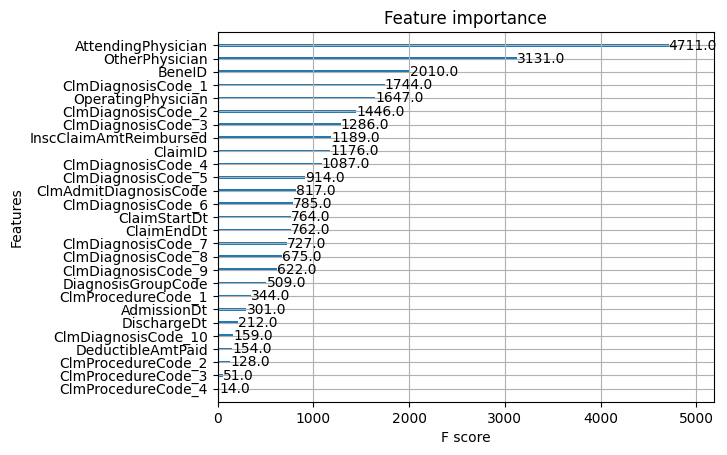

In [ ]:
plot_importance(clf)